In [1]:
from pyspark.sql import  SQLContext, Row
from pyspark import SparkContext,SparkConf
import pandas as pd
from pyspark.sql.functions import regexp_extract, regexp_replace, when,udf,col,count,sum,avg,round
import pyspark.sql.functions as F

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (8, 6)

In [3]:
sc = SparkContext('local')
sqlCtx = SQLContext( sc )

In [4]:
df= sqlCtx.read.csv( '../data/sp500.csv', header=True,inferSchema=True )
df.show()

+-------------------+-----+-----+-----+-----+--------+----+
|               date| open| high|  low|close|  volume|Name|
+-------------------+-----+-----+-----+-----+--------+----+
|2013-02-08 00:00:00|15.07|15.12|14.63|14.75| 8407500| AAL|
|2013-02-11 00:00:00|14.89|15.01|14.26|14.46| 8882000| AAL|
|2013-02-12 00:00:00|14.45|14.51| 14.1|14.27| 8126000| AAL|
|2013-02-13 00:00:00| 14.3|14.94|14.25|14.66|10259500| AAL|
|2013-02-14 00:00:00|14.94|14.96|13.16|13.99|31879900| AAL|
|2013-02-15 00:00:00|13.93|14.61|13.93| 14.5|15628000| AAL|
|2013-02-19 00:00:00|14.33|14.56|14.08|14.26|11354400| AAL|
|2013-02-20 00:00:00|14.17|14.26|13.15|13.33|14725200| AAL|
|2013-02-21 00:00:00|13.62|13.95| 12.9|13.37|11922100| AAL|
|2013-02-22 00:00:00|13.57| 13.6|13.21|13.57| 6071400| AAL|
|2013-02-25 00:00:00| 13.6|13.76| 13.0|13.02| 7186400| AAL|
|2013-02-26 00:00:00|13.14|13.42| 12.7|13.26| 9419000| AAL|
|2013-02-27 00:00:00|13.28|13.62|13.18|13.41| 7390500| AAL|
|2013-02-28 00:00:00|13.49|13.63|13.39|1

# <문제>

## 1. 거래량(volume)이 가장 많은 기간과 데이터

## 1-1. 연도별 및 월별 거래량 합계

In [5]:
df.groupBy( F.year('date') .alias('year'), F.month('date').alias('month') ).sum('volume').orderBy('sum(volume)', ascending=False).show()

+----+-----+-----------+
|year|month|sum(volume)|
+----+-----+-----------+
|2016|    1|58442534080|
|2016|    2|57104329980|
|2014|   10|54971791242|
|2013|    4|52238379265|
|2016|   11|52111782783|
|2015|    8|50735736997|
|2013|    5|50722659140|
|2013|   10|50522477955|
|2014|    1|50255306758|
|2016|    3|49771161483|
|2015|   10|49516472690|
|2013|    6|49310268717|
|2016|    6|49209140882|
|2015|   12|47989361875|
|2014|    4|47939618962|
|2018|    1|47581126844|
|2015|    9|47572279195|
|2017|    6|46661300393|
|2013|    7|46375027950|
|2017|    3|46276637799|
+----+-----+-----------+
only showing top 20 rows



## 1-2. 월별 거래량 합계

In [6]:
df.groupBy( F.month('date') .alias('month')).sum('volume').orderBy('sum(volume)', ascending= False).show()

+-----+------------+
|month| sum(volume)|
+-----+------------+
|    1|243622807925|
|   10|241682208425|
|    2|233042278219|
|    3|231596338854|
|    4|224626114237|
|    6|224615275435|
|   12|215208361304|
|   11|214138056348|
|    5|213581314556|
|    9|213165891846|
|    7|212108692551|
|    8|207994215093|
+-----+------------+



#### 분석결과 
#### 1. 연초에 거래량이 많은 경향이 있음

## 1-3. 연도별 거래량 합계

In [7]:
df.groupBy( F.year('date') .alias('year')).sum('volume').orderBy('sum(volume)', ascending= False).show()

+----+------------+
|year| sum(volume)|
+----+------------+
|2016|571045692991|
|2015|534954787348|
|2014|509651540155|
|2017|500400300045|
|2013|495968612715|
|2018| 63360621539|
+----+------------+



#### 분석결과 
#### 1. 년도를 통해 확인했을 때 2016년에 거래량이 가장 많았고 2017년도 떨어진 모습을 보이는데
#### 미국 대선시기가 2016년이므로 영향이 있지 않을까 추측함

## 1-4. 연도별 및 기업별 거래량 합계

In [45]:
df_year=df.groupBy( F.year('date').alias('year'), 'Name').sum('volume').orderBy('sum(volume)', ascending= False)

df_year=df_year.toPandas()
df_year_head= df_year.head(20)

df_year_head.set_index(['Name','year'], inplace=True)
df_year_head

sum(volume)
Name year             
BAC  2016  27334962763
     2013  25900488539
     2014  21596355815
AAPL 2013  21574452606
BAC  2015  21277893728
     2017  19779231722
AMD  2017  16355699307
AAPL 2014  15934013092
GE   2015  13240903695
FB   2013  13150863416
AAPL 2015  13068421452
FB   2014  11992840898
CHK  2016  11660994934
GE   2017  11567501957
MSFT 2013  10884560394
FCX  2016  10478573933
AAPL 2016   9686251480
F    2017   9285512479
MSFT 2015   9060335714
F    2016   8997854571

#### 분석결과 
#### 1. BAC(Bank of America) 는 매년 거래량이 매우 많은 모습을 보여줌
#### 2. AMD(미국 반도체 회사) 는 그 이전에 비해 2017년도 급격한 거래량 증가를 보여줌 -> 새로운 기술 출시 혹은 대선의 영향 추측
#### 3. AAPL(애플) 은 2013 년도 이후 꾸준히 거래량이 하락세를 보임

## 1-5. 기업별 2013 ~ 2018년까지의 총 거래량

In [9]:
df.groupBy('Name').sum('volume').orderBy('sum(volume)', ascending=False).show()

+-----+------------+
| Name| sum(volume)|
+-----+------------+
|  BAC|117884953591|
| AAPL| 68046305767|
|   GE| 53023644686|
|    F| 43388129992|
|   FB| 43258314899|
| MSFT| 42641653597|
|  AMD| 40941468586|
|   MU| 38082749687|
| INTC| 36922332801|
| CSCO| 36075826186|
|  PFE| 35527608853|
|    T| 31850598073|
|  CHK| 31421758366|
|CMCSA| 30630585625|
|  FCX| 29648463667|
|    C| 26044628798|
|  WFC| 23305954532|
|  JPM| 20885592857|
|   RF| 20645650500|
| NFLX| 20405882026|
+-----+------------+
only showing top 20 rows



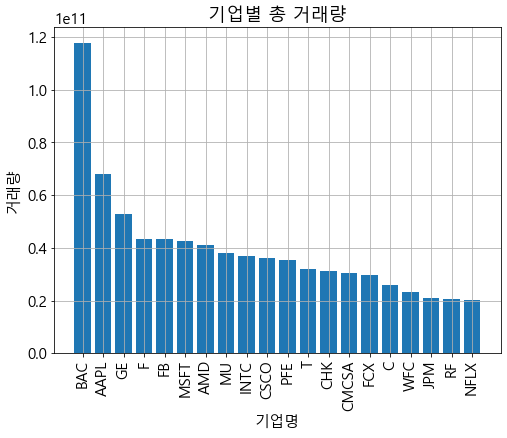

In [57]:
df_company=df.groupBy('Name').sum('volume').orderBy('sum(volume)', ascending=False)
df_company=df_company.toPandas()

df_company.set_index('Name', inplace=True)

df_company_head = df_company.head(20)

plt.bar( df_company_head.index, df_company_head['sum(volume)'])
plt.xlabel('기업명')
plt.ylabel('거래량')
plt.title('기업별 총 거래량')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### 분석결과 
#### 1. 은행인 BAC 를 제외하면  애플이 기간 중 가장 많은 거래량을 보임
#### 2. 상위권을 확인해보면 대체로 컴퓨터, 휴대폰과 관련된 기업들임

# 2. 2016년 11월 8일 미국대선일을 기준으로 전후 6개월 비교

## 2-1. 미국 대선 이전 6개월 기간과 이후 6개월 기간의 연도별 및 월별 평균

In [10]:
df_pres_bef_six = df.where("date >= '2016-05-08' and date < '2016-11-08'")
df_pres_aft_six = df.where("date >= '2016-11-08' and date <= '2017-05-08'")

In [11]:
df_pres_bef_six.show()

+-------------------+-----+-------+-------+-----+--------+----+
|               date| open|   high|    low|close|  volume|Name|
+-------------------+-----+-------+-------+-----+--------+----+
|2016-05-09 00:00:00|33.03|   33.8|  32.94|32.94| 9312525| AAL|
|2016-05-10 00:00:00|33.24|   33.8|  33.09|33.77| 8124367| AAL|
|2016-05-11 00:00:00|33.68|  34.04|  32.85|32.86| 8148588| AAL|
|2016-05-12 00:00:00|33.01|33.0199|  31.29|31.33|14228217| AAL|
|2016-05-13 00:00:00|31.09|  32.01|  31.08|31.51|10132516| AAL|
|2016-05-16 00:00:00|31.81|   32.3|  30.99|32.12|12397759| AAL|
|2016-05-17 00:00:00|32.25|  33.29|  32.02|32.64|13303448| AAL|
|2016-05-18 00:00:00|32.61|  33.36|  32.34|32.61| 9136275| AAL|
|2016-05-19 00:00:00|32.28|  32.59|  31.69|32.15| 8875353| AAL|
|2016-05-20 00:00:00| 32.3|  32.81|  31.95|32.01| 7277953| AAL|
|2016-05-23 00:00:00|32.03|  32.29|   31.7|31.73| 6498413| AAL|
|2016-05-24 00:00:00|31.89| 32.275|  31.85|32.15| 6962729| AAL|
|2016-05-25 00:00:00|32.39|   32.9|   32

In [12]:
df_pres_aft_six.show()

+-------------------+-----+-------+-----+-----+--------+----+
|               date| open|   high|  low|close|  volume|Name|
+-------------------+-----+-------+-----+-----+--------+----+
|2016-11-08 00:00:00|41.42|  41.85|41.02| 41.7| 5725832| AAL|
|2016-11-09 00:00:00|40.76|  42.75|40.44|42.41| 8392383| AAL|
|2016-11-10 00:00:00|42.71|  43.39|42.15| 42.3| 8666121| AAL|
|2016-11-11 00:00:00|42.07|  42.95|41.68|42.93| 6623490| AAL|
|2016-11-14 00:00:00|43.01|  43.61|42.98| 43.4| 7773627| AAL|
|2016-11-15 00:00:00| 45.0|  45.28|43.59|44.76|13166625| AAL|
|2016-11-16 00:00:00|44.66| 44.795|43.93|44.45| 6166966| AAL|
|2016-11-17 00:00:00|44.39|  45.85|44.05|45.83| 8558682| AAL|
|2016-11-18 00:00:00|46.15|  46.49|45.62|46.26| 7795053| AAL|
|2016-11-21 00:00:00|46.46|  46.75|45.95|46.08| 6651810| AAL|
|2016-11-22 00:00:00|46.03|  46.95|45.95|46.08| 5781259| AAL|
|2016-11-23 00:00:00|46.05|  46.39| 45.7|46.34| 5160176| AAL|
|2016-11-25 00:00:00|46.34|  46.86| 46.3|46.82| 2426632| AAL|
|2016-11

In [13]:
# 미국 대선 이전 6개월 기간의 연도별 월별 평균

df_pres_bef_six = df_pres_bef_six.groupBy(F.year('date'), F.month('date')).mean().orderBy('month(date)')
df_pres_bef_six.show()

+----------+-----------+-----------------+-----------------+-----------------+-----------------+------------------+
|year(date)|month(date)|        avg(open)|        avg(high)|         avg(low)|       avg(close)|       avg(volume)|
+----------+-----------+-----------------+-----------------+-----------------+-----------------+------------------+
|      2016|          5|84.38501716549294|85.20130323189103|83.66056545523156| 84.4495474723338| 4143722.735663984|
|      2016|          6|85.03732521492617|85.84623468081216|84.29035765502114|85.13570794768584| 4500561.631790744|
|      2016|          7|87.56923749372403| 88.3065491414798|86.86112068480799| 87.6792891064259|4094392.9464859436|
|      2016|          8|89.12112059542544|89.75051917234046|88.45692800768315|89.09827270822394|3645052.5863453816|
|      2016|          9|88.10127756741274|88.85160714285685|87.35581932491915|88.12868331420954|  4343106.92216485|
|      2016|         10|87.33162398164087|87.98921470644476|86.503251099

In [14]:
# 미국 대선 이후 6개월 기간의 연도별 월별 평균

df_pres_aft_six = df_pres_aft_six.groupBy(F.year('date'), F.month('date')).mean().orderBy('year(date)', 'month(date)')
df_pres_aft_six.show()

+----------+-----------+-----------------+-----------------+-----------------+-----------------+------------------+
|year(date)|month(date)|        avg(open)|        avg(high)|         avg(low)|       avg(close)|       avg(volume)|
+----------+-----------+-----------------+-----------------+-----------------+-----------------+------------------+
|      2016|         11|88.60249106425671|89.66988000752984|  87.705188315763|88.77985824548196|  5085709.16127008|
|      2016|         12| 90.5853482439396|91.35902646497418|89.75728349875939|90.52578202901324|4130377.3358465354|
|      2017|          1| 91.5401090309031|92.30373120311958|90.73828479848055|91.60367921792218| 4182645.217221722|
|      2017|          2|93.73224743157913|94.53321850526302|93.04421584210552| 93.9180423368421| 4255274.505789474|
|      2017|          3|95.25398650434792| 95.9491686956521|94.53938065217417| 95.2569570869569|4024055.4607826085|
|      2017|          4| 95.4244197079525|96.12473212522289|94.709694967

## 2-2. 종가 평균, 거래량 평균에 대해 라인차트 그리기

In [15]:
# 판다스 데이터프레임으로 변환

df_bef_six = df_pres_bef_six.toPandas()
df_aft_six = df_pres_aft_six.toPandas()

In [16]:
df_bef_six

,year(date),month(date),avg(open),avg(high),avg(low),avg(close),avg(volume)
0,2016,5,84.385017,85.201303,83.660565,84.449547,4.143723e+06
1,2016,6,85.037325,85.846235,84.290358,85.135708,4.500562e+06
2,2016,7,87.569237,88.306549,86.861121,87.679289,4.094393e+06
3,2016,8,89.121121,89.750519,88.456928,89.098273,3.645053e+06
4,2016,9,88.101278,88.851607,87.355819,88.128683,4.343107e+06
5,2016,10,87.331624,87.989215,86.503251,87.166187,4.148940e+06
6,2016,11,85.200464,86.053519,84.240862,85.017090,4.654158e+06


In [17]:
df_aft_six

,year(date),month(date),avg(open),avg(high),avg(low),avg(close),avg(volume)
0,2016,11,88.602491,89.669880,87.705188,88.779858,5.085709e+06
1,2016,12,90.585348,91.359026,89.757283,90.525782,4.130377e+06
2,2017,1,91.540109,92.303731,90.738285,91.603679,4.182645e+06
3,2017,2,93.732247,94.533219,93.044216,93.918042,4.255275e+06
4,2017,3,95.253987,95.949169,94.539381,95.256957,4.024055e+06
5,2017,4,95.424420,96.124732,94.709695,95.391409,3.879889e+06
6,2017,5,97.162214,97.903267,96.373048,97.228553,4.154036e+06


In [18]:
# 연도 칼럼과 월 칼럼을 하나의 칼럼으로 합치기

cols = ['year(date)', 'month(date)']
df_bef_six['date'] = df_bef_six[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

cols = ['year(date)', 'month(date)']
df_aft_six['date'] = df_aft_six[cols].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)

In [19]:
# 인덱스 지정

df_bef_six.set_index('date', inplace=True)
df_bef_six.drop(columns=['year(date)', 'month(date)'], inplace=True)

df_aft_six.set_index('date', inplace=True)
df_aft_six.drop(columns=['year(date)', 'month(date)'], inplace=True)

In [20]:
df_bef_six

,avg(open),avg(high),avg(low),avg(close),avg(volume)
date,,,,,
2016-5,84.385017,85.201303,83.660565,84.449547,4.143723e+06
2016-6,85.037325,85.846235,84.290358,85.135708,4.500562e+06
2016-7,87.569237,88.306549,86.861121,87.679289,4.094393e+06
2016-8,89.121121,89.750519,88.456928,89.098273,3.645053e+06
2016-9,88.101278,88.851607,87.355819,88.128683,4.343107e+06
2016-10,87.331624,87.989215,86.503251,87.166187,4.148940e+06
2016-11,85.200464,86.053519,84.240862,85.017090,4.654158e+06


In [21]:
df_aft_six

,avg(open),avg(high),avg(low),avg(close),avg(volume)
date,,,,,
2016-11,88.602491,89.669880,87.705188,88.779858,5.085709e+06
2016-12,90.585348,91.359026,89.757283,90.525782,4.130377e+06
2017-1,91.540109,92.303731,90.738285,91.603679,4.182645e+06
2017-2,93.732247,94.533219,93.044216,93.918042,4.255275e+06
2017-3,95.253987,95.949169,94.539381,95.256957,4.024055e+06
2017-4,95.424420,96.124732,94.709695,95.391409,3.879889e+06
2017-5,97.162214,97.903267,96.373048,97.228553,4.154036e+06


In [22]:
# 문자열을 datetime형으로 변환

df_bef_six.index = pd.to_datetime(df_bef_six.index, format='%Y-%m')
df_aft_six.index = pd.to_datetime(df_aft_six.index, format='%Y-%m')

In [23]:
# datetime형으로 변환된 것을 확인할 수 있음!

df_bef_six.index

DatetimeIndex(['2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [24]:
df_aft_six.index

DatetimeIndex(['2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01'],
              dtype='datetime64[ns]', name='date', freq=None)

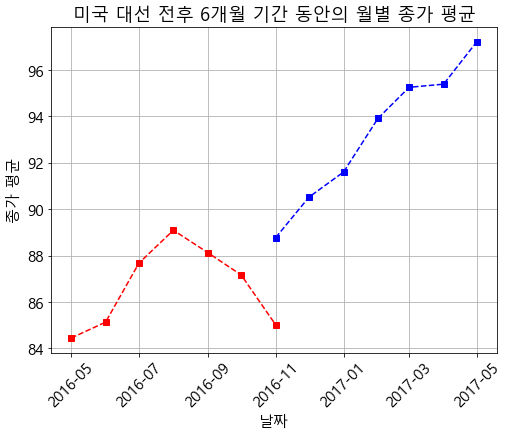

In [25]:
plt.plot(df_bef_six.index, df_bef_six['avg(close)'],'rs--')
plt.plot(df_aft_six.index, df_aft_six['avg(close)'],'bs--')
plt.xlabel('날짜')
plt.ylabel('종가 평균')
plt.title('미국 대선 전후 6개월 기간 동안의 월별 종가 평균')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 분석결과 
#### 1. 미국 대선의 영향인지 정확히 알 수 없지만, 미국 대선 이후 주가 상승이 있음을 확인할 수 있음
#### 2. 미국 대선이 가까워질수록 종가평균이 점점 하락한 반면,  미국 대선 이후로는 급격히 상승함
#### 3. 2016년 11월달만 보면, 8일 대선을 기점으로 종가평균이 크게 차이남을 확인할 수 있음 

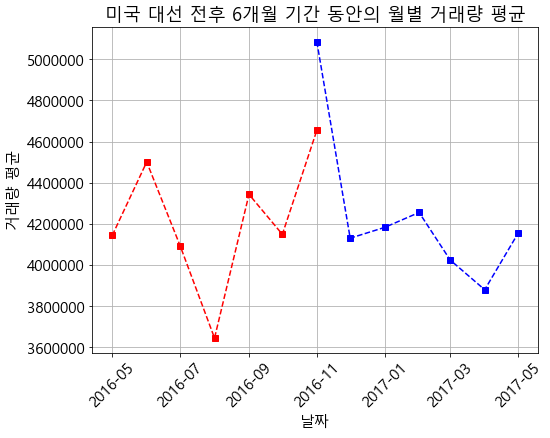

In [26]:
plt.plot(df_bef_six.index, df_bef_six['avg(volume)'],'rs--')
plt.plot(df_aft_six.index, df_aft_six['avg(volume)'],'bs--')
plt.xlabel('날짜')
plt.ylabel('거래량 평균')
plt.title('미국 대선 전후 6개월 기간 동안의 월별 거래량 평균')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 분석결과 
#### 1. 미국 대선이 있는 2016년 11월달에는 거래량이 매우 많음을 알 수 있음
#### 2. 미국 대선 이후 2016년 12월달에는 이전 달과 비교했을 때 거래량이 큰 폭으로 감소했음

# 3. 미국대선(2016년 11월 8일) 전후 기업별 종가 평균의 차이를 계산하여 가장 큰 차이를 보인 기업 5개

### 대선일 기준으로 나누기

In [27]:
df_pres_bef=df.where(df['date']<'2016-11-08')
df_pres_aft=df.where(df['date']>='2016-11-08')

In [28]:
df_pres_bef.show(5)

+-------------------+-----+-----+-----+-----+--------+----+
|               date| open| high|  low|close|  volume|Name|
+-------------------+-----+-----+-----+-----+--------+----+
|2013-02-08 00:00:00|15.07|15.12|14.63|14.75| 8407500| AAL|
|2013-02-11 00:00:00|14.89|15.01|14.26|14.46| 8882000| AAL|
|2013-02-12 00:00:00|14.45|14.51| 14.1|14.27| 8126000| AAL|
|2013-02-13 00:00:00| 14.3|14.94|14.25|14.66|10259500| AAL|
|2013-02-14 00:00:00|14.94|14.96|13.16|13.99|31879900| AAL|
+-------------------+-----+-----+-----+-----+--------+----+
only showing top 5 rows



### 기업별 close 평균 구하기

In [29]:
# 미국 대선 전

df1 = df_pres_bef.groupBy('Name').mean('close')
df1 = df1.withColumnRenamed('avg(close)', 'bef_avg(close)')

In [30]:
# 미국 대선 후

df2 = df_pres_aft.groupBy('Name').mean('close')
df2 = df2.withColumnRenamed('avg(close)', 'aft_avg(close)')

### 대선전후 데이터 join

In [31]:
df3 = df2.join(df1, on='Name')
df3.show(5)

+----+------------------+------------------+
|Name|    aft_avg(close)|    bef_avg(close)|
+----+------------------+------------------+
|ALXN|124.86146496815287|148.38444126984152|
| GIS| 57.53429936305735| 54.99088888888893|
|   K| 69.42848726114649| 67.20423280423276|
| LEN| 51.97154713375796| 42.23455121693121|
|SPGI| 144.1562898089173|  86.9627301587301|
+----+------------------+------------------+
only showing top 5 rows



### 각 회사별 대선 전후의 차이

In [32]:
# 대선 이후의 종가 평균 - 대선 이전의 종가 평균

df4 = df3.withColumn('차이', df3['aft_avg(close)']-df3['bef_avg(close)'])
df4.show(5)

+----+------------------+------------------+-------------------+
|Name|    aft_avg(close)|    bef_avg(close)|               차이|
+----+------------------+------------------+-------------------+
|ALXN|124.86146496815287|148.38444126984152|-23.522976301688644|
| GIS| 57.53429936305735| 54.99088888888893|  2.543410474168418|
|   K| 69.42848726114649| 67.20423280423276| 2.2242544569137266|
| LEN| 51.97154713375796| 42.23455121693121|   9.73699591682675|
|SPGI| 144.1562898089173|  86.9627301587301|  57.19355965018721|
+----+------------------+------------------+-------------------+
only showing top 5 rows



In [33]:
# 대선 이전과 비교하여 종가 평균이 하락한 기업 5개
df4_low = df4.orderBy('차이',ascending=True)
df4_low.show(5)

+----+------------------+------------------+-------------------+
|Name|    aft_avg(close)|    bef_avg(close)|               차이|
+----+------------------+------------------+-------------------+
| CMG| 374.5169745222929| 532.7100359788358|-158.19306145654286|
|PRGO| 79.85242038216568|141.06538941798945|-61.212969035823775|
|  RL| 87.63912420382162|141.74248677248676| -54.10336256866513|
|SRCL| 75.52313694267515|117.12031957671972| -41.59718263404457|
| RRC|24.112834394904453|59.465375661375695| -35.35254126647124|
+----+------------------+------------------+-------------------+
only showing top 5 rows



In [34]:
# 대선 이전과 비교하여 종가 평균이 상승한 기업 5개
df4_high = df4.sort('차이',ascending=False)
df4_high.show(5)

+-----+------------------+------------------+------------------+
| Name|    aft_avg(close)|    bef_avg(close)|              차이|
+-----+------------------+------------------+------------------+
| PCLN|1772.2396496815284|1160.2376021164025| 612.0020475651258|
| AMZN| 973.7792675159242|445.00029735449755| 528.7789701614266|
|GOOGL|   938.36550955414| 597.1276651851848|341.23784436895517|
| GOOG| 921.1591401273885| 632.4119499243569|288.74719020303155|
|  MTD| 552.8788216560511| 290.9784126984127| 261.9004089576384|
+-----+------------------+------------------+------------------+
only showing top 5 rows



#### 분석결과 
#### 1 .CMG, PRGO, RL, SRCL, RRC의 주식의 마감가의 평균이 대선 이후 대폭 하락한 것을 알 수 있음
#### 2. PCLN, AMZN, GOOGL, GOOG, MTD의 주식의 마감가의 평균이 대선 이후 대폭 상승한 것을 알 수 있음

### 하락한 CMG 주식

In [35]:
df_CMG = df.where(df['Name']=='CMG')
df_CMG = df_CMG.groupby(F.year('date')).mean('close').orderBy('year(date)')

In [36]:
df_CMG = df_CMG.toPandas()

In [37]:
df_CMG = df_CMG.set_index('year(date)')

### 상승한 PCNL 주식

In [38]:
df_PCLN = df.where(df['Name']=='PCLN')
df_PCLN = df_PCLN.groupby(F.year('date')).mean('close').orderBy('year(date)')

In [39]:
df_PCLN = df_PCLN.toPandas()

In [40]:
df_PCLN = df_PCLN.set_index('year(date)')

### 라인차트 그리기

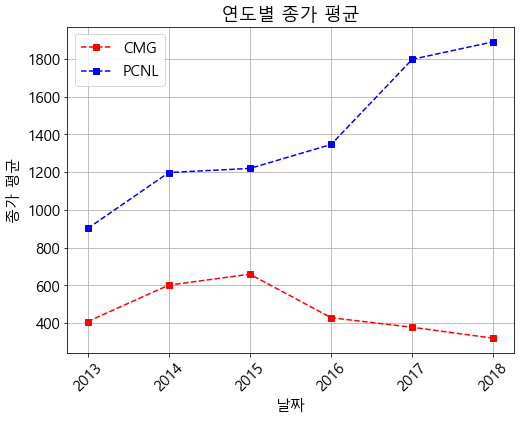

In [48]:
plt.xticks(rotation=45)
plt.plot(df_CMG.index, df_CMG['avg(close)'],'rs--')
plt.plot(df_PCLN.index, df_PCLN['avg(close)'],'bs--')
plt.xlabel('날짜')
plt.ylabel('종가 평균')
plt.title('연도별 종가 평균')
plt.legend(['CMG', 'PCNL'])
plt.grid(True)
plt.show()

#### 분석결과 
#### 1. 2016년을 기점으로 두 주식의 상승세와 하락세를 확실히 알 수 있음 - 대선이 주가에 영향을 준다고 생각됨